In [22]:
import numpy as npp
import minpy.numpy as np
import cPickle
import matplotlib.pyplot as plt
import minpy
minpy.set_global_policy('only_numpy')

from VirtualRatModel import VirtualRatModel
from VirtualRatSolver import VirtualRatSolver
from VirtualRatBox import VirtualRatBox
from VirtualRat import VirtualRat
from dataProcessFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
which_to_choose = load_weights("time_steps_for_3d-0.85.pkl")

In [5]:
which_to_choose

[(1, 32),
 (2, 31),
 (3, 31),
 (4, 34),
 (5, 31),
 (6, 32),
 (8, 31),
 (9, 31),
 (10, 69),
 (11, 33),
 (12, 40),
 (13, 40),
 (14, 32),
 (15, 33),
 (16, 32),
 (17, 34),
 (18, 32),
 (19, 33),
 (20, 31),
 (21, 33),
 (22, 31),
 (23, 32),
 (24, 33),
 (25, 35),
 (26, 32),
 (27, 32),
 (28, 32),
 (29, 32),
 (30, 33),
 (31, 32),
 (32, 31),
 (33, 32),
 (34, 36),
 (35, 35),
 (36, 34),
 (37, 32),
 (38, 31),
 (39, 35),
 (41, 31),
 (42, 31),
 (43, 31),
 (44, 31),
 (45, 46),
 (46, 47),
 (47, 32),
 (48, 32),
 (50, 32),
 (51, 32),
 (52, 32),
 (53, 31),
 (54, 33),
 (55, 33),
 (56, 37),
 (57, 36),
 (58, 31),
 (59, 32),
 (60, 32),
 (61, 32),
 (62, 33),
 (63, 32),
 (64, 32),
 (65, 85),
 (66, 35),
 (67, 33),
 (68, 42),
 (69, 33),
 (70, 31),
 (71, 33),
 (73, 32),
 (74, 39),
 (75, 33),
 (76, 36),
 (77, 32),
 (78, 35),
 (79, 32),
 (80, 31),
 (81, 32),
 (83, 33),
 (84, 33),
 (85, 40),
 (86, 32),
 (87, 32),
 (88, 34),
 (89, 46),
 (90, 46),
 (91, 36),
 (92, 34),
 (93, 32),
 (94, 34),
 (95, 32),
 (96, 33),
 (98, 3

VirtualRatBox.py:192: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  X[0,prev_t:t,0] = pro_rule
VirtualRatBox.py:198: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  X[0,prev_t:,0] = pro_rule


VirtualRat1


/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


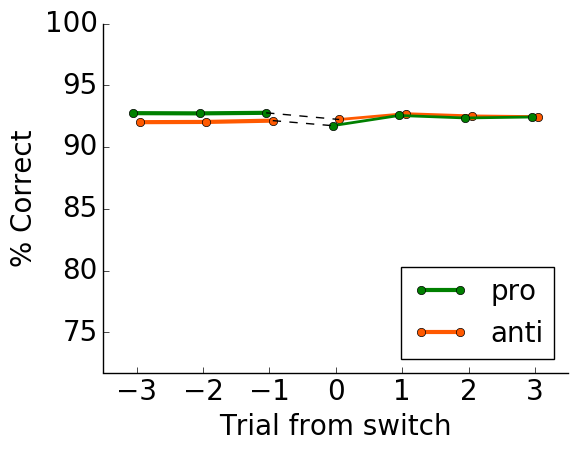

VirtualRat2


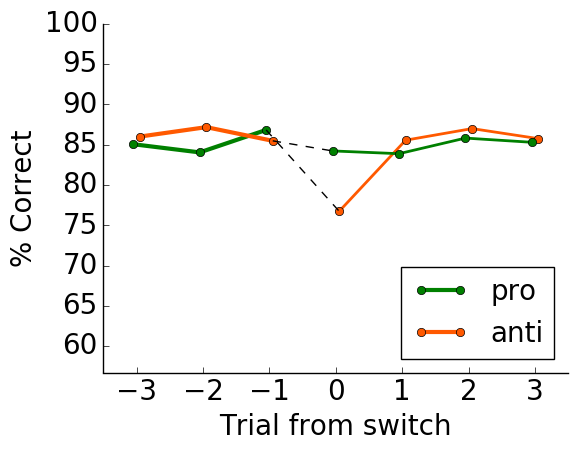

VirtualRat3


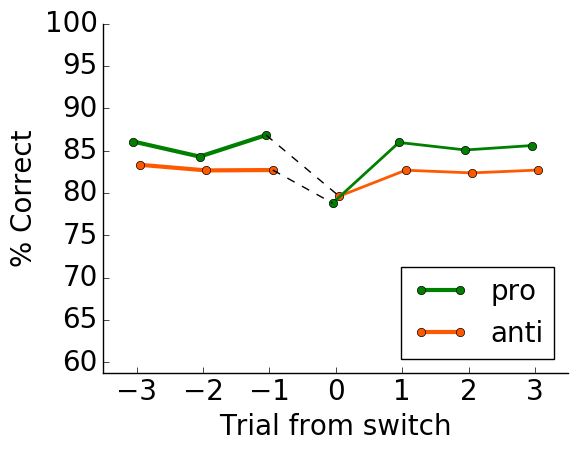

VirtualRat4


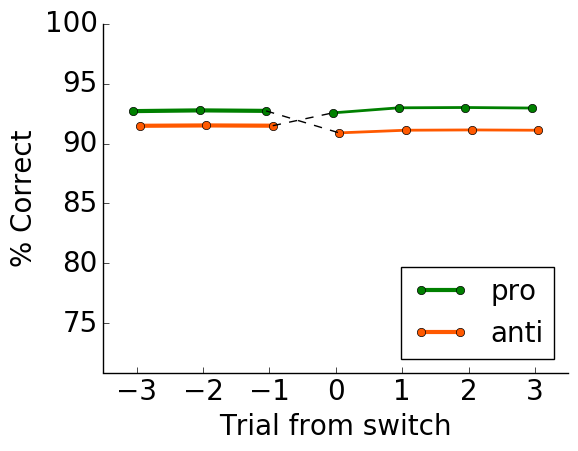

VirtualRat5


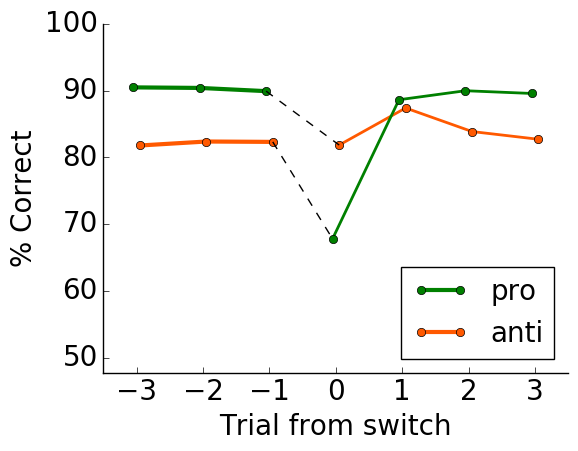

VirtualRat6


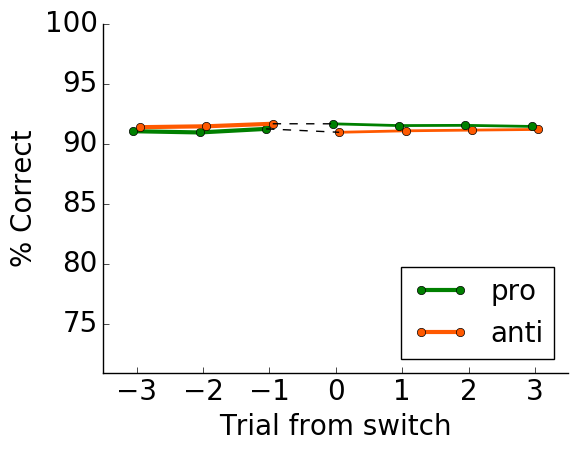

VirtualRat8


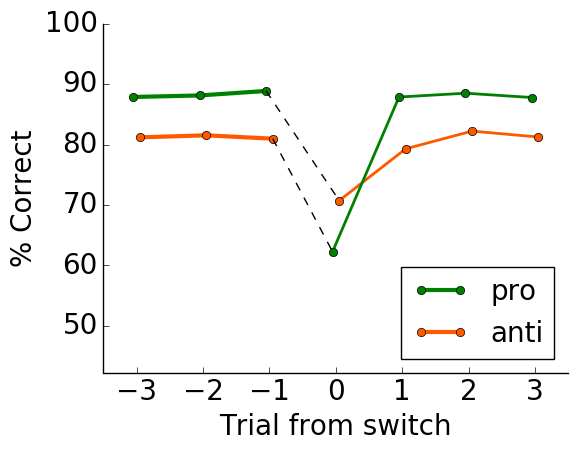

VirtualRat9


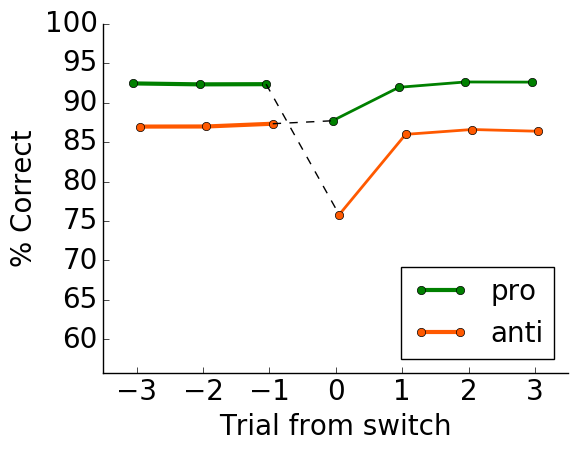

VirtualRat10


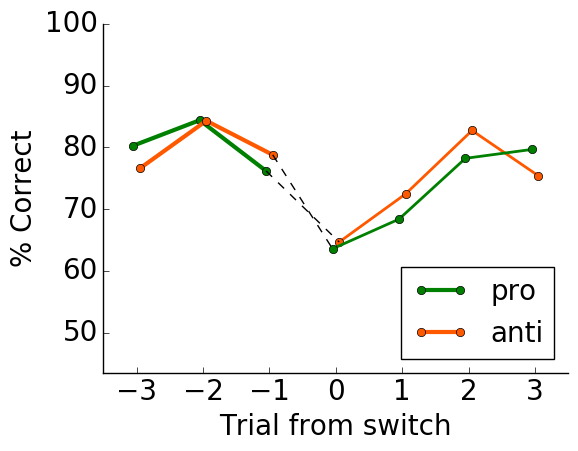

VirtualRat11


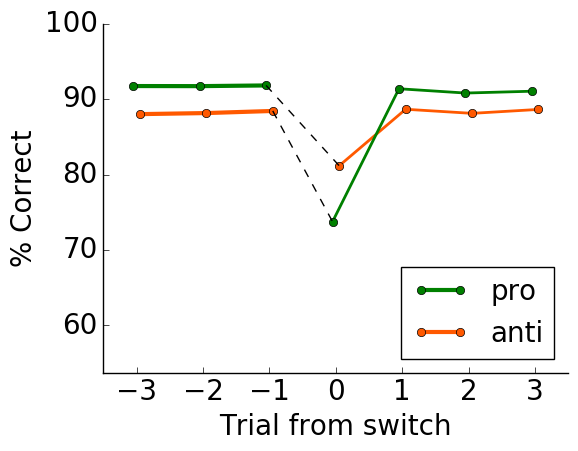

VirtualRat12


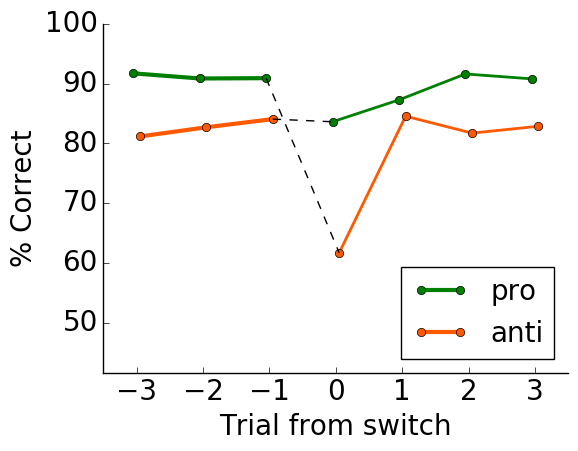

VirtualRat13


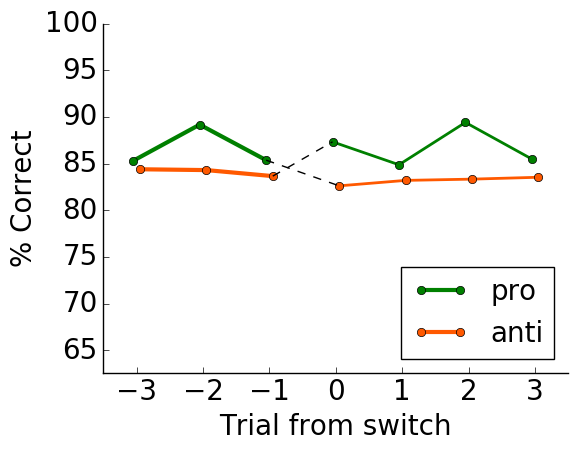

VirtualRat14


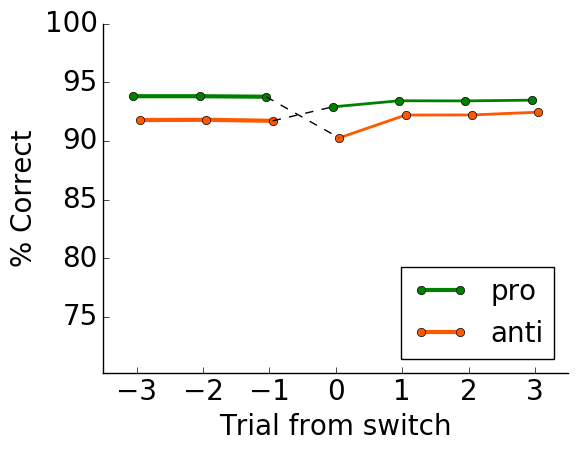

VirtualRat15


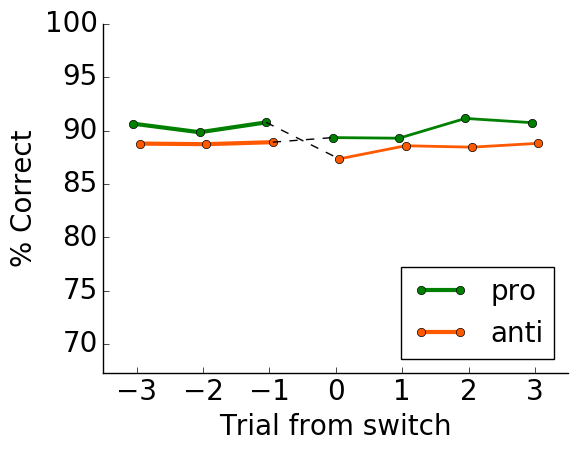

VirtualRat16


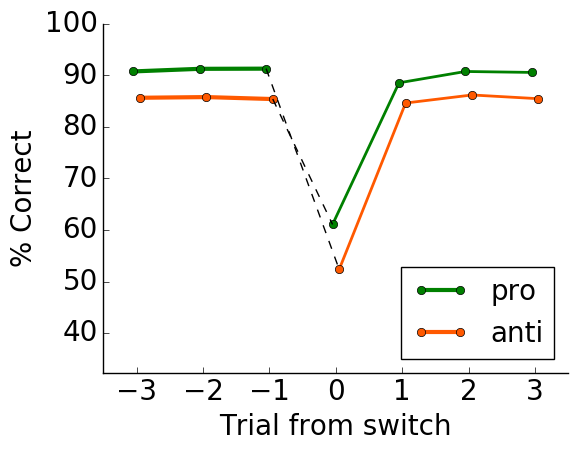

VirtualRat17


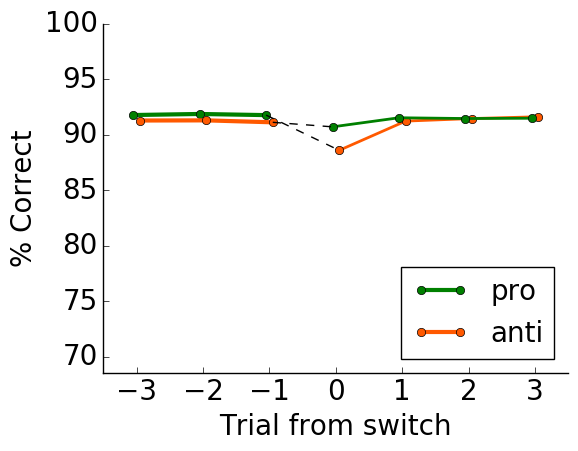

VirtualRat18


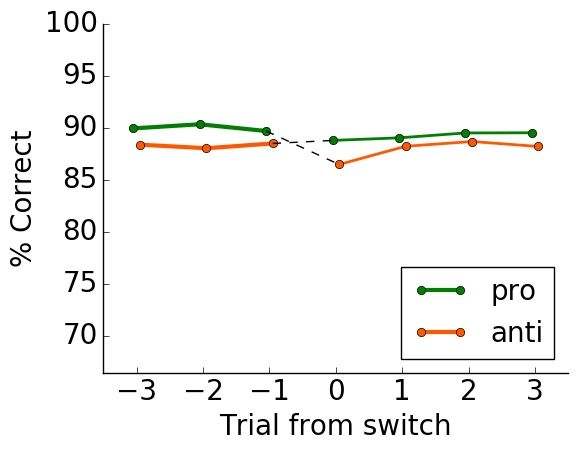

VirtualRat19


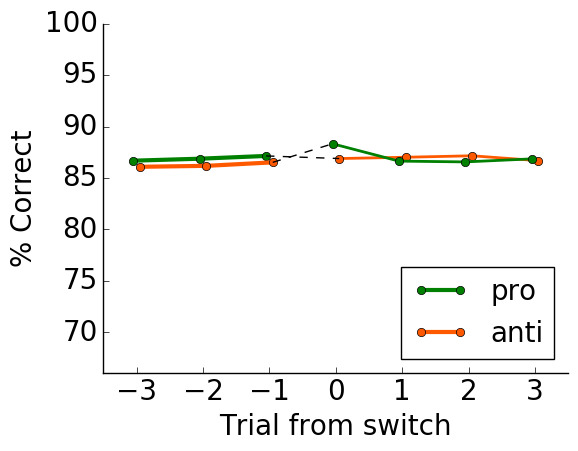

VirtualRat20


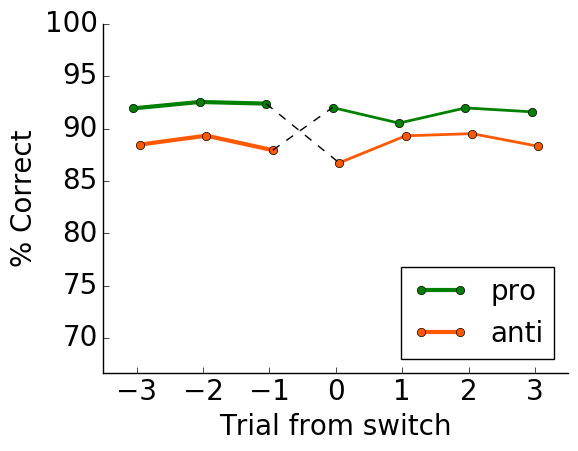

VirtualRat21


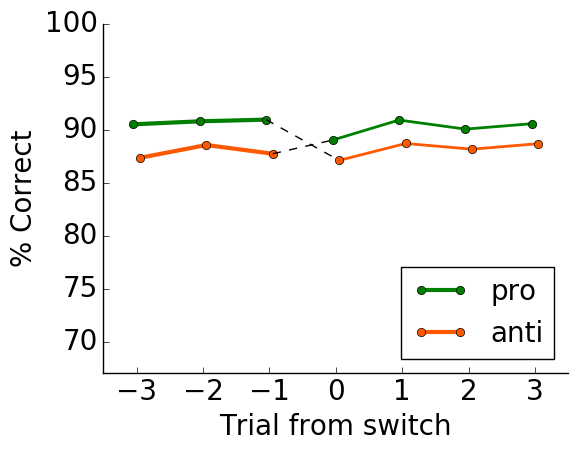

VirtualRat22


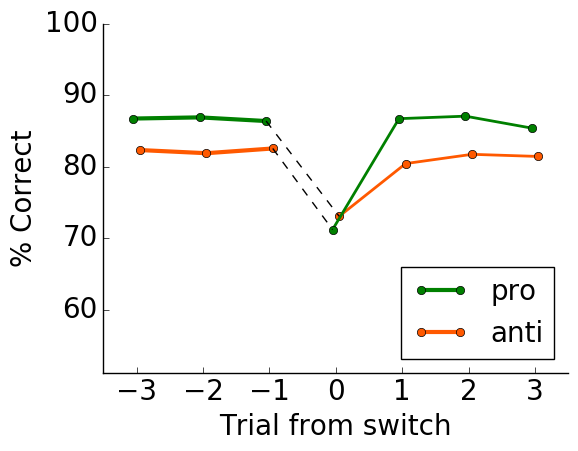

VirtualRat23


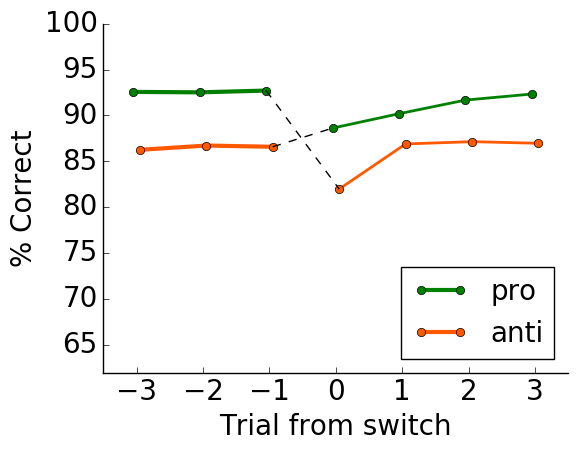

VirtualRat24


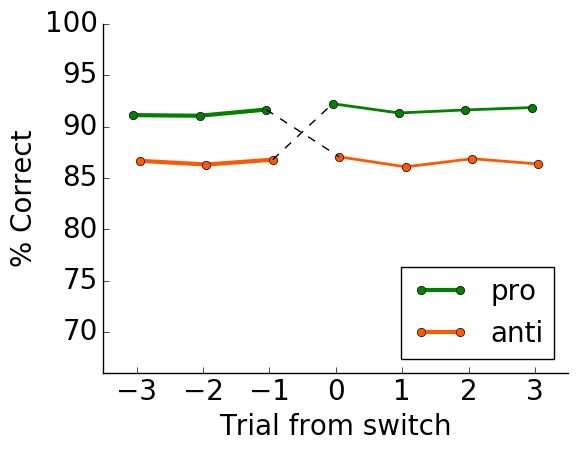

VirtualRat25


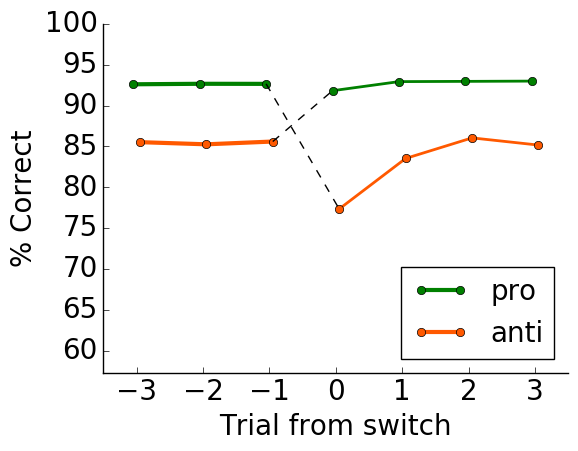

VirtualRat26


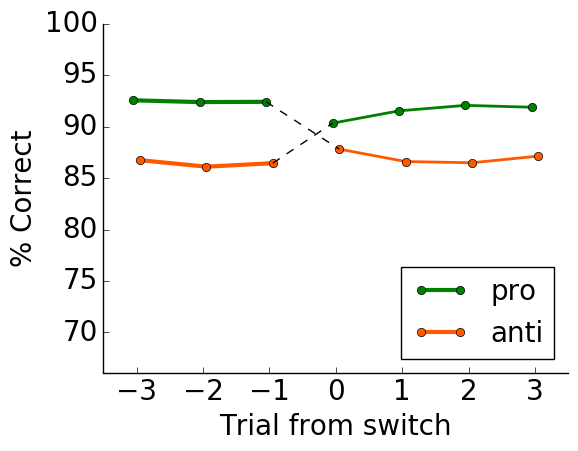

VirtualRat27


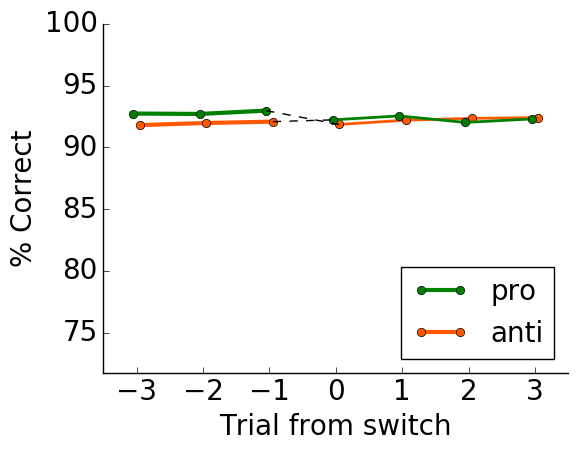

VirtualRat28


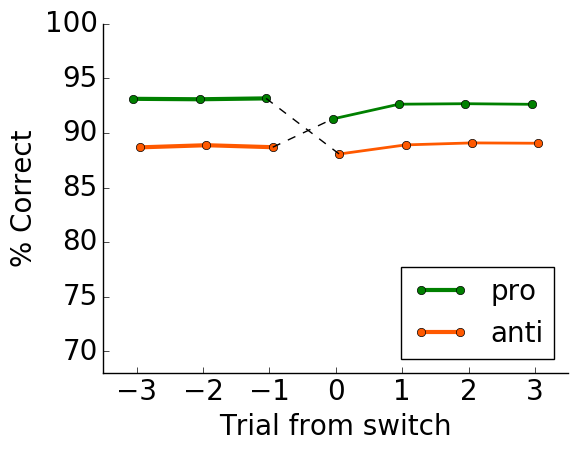

VirtualRat29


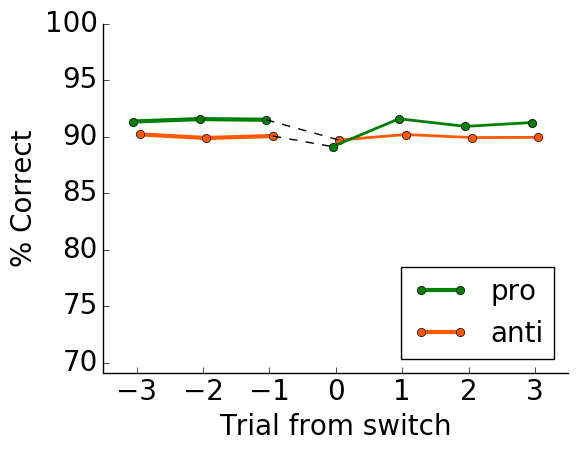

VirtualRat30


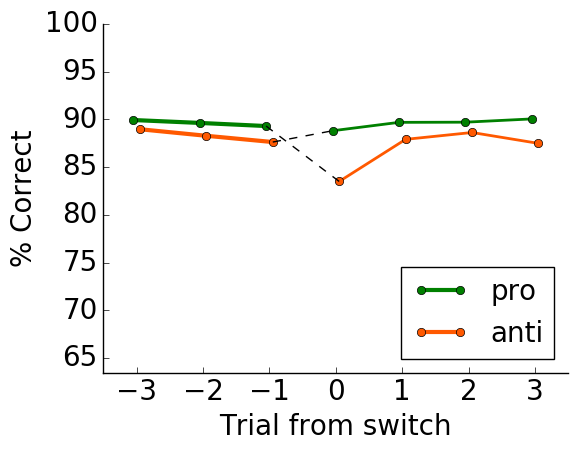

VirtualRat31


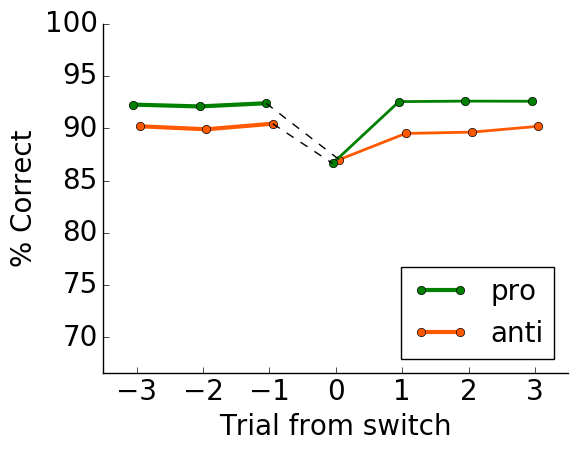

VirtualRat32


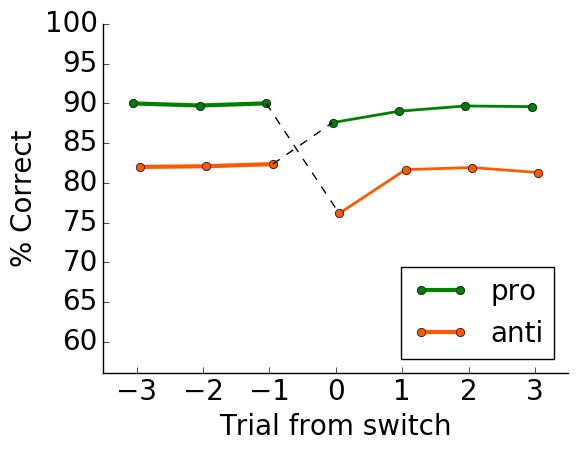

VirtualRat33


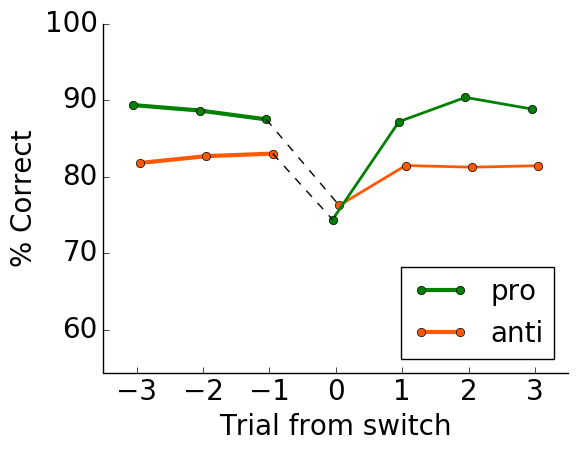

VirtualRat34


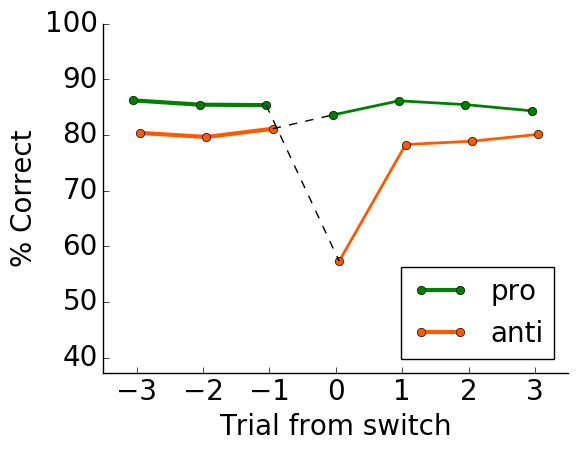

VirtualRat35


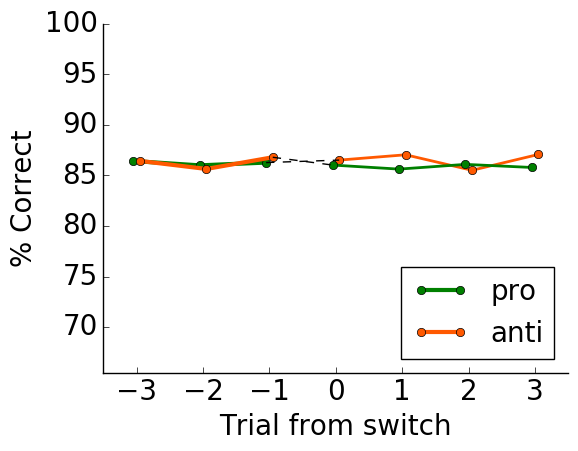

VirtualRat36


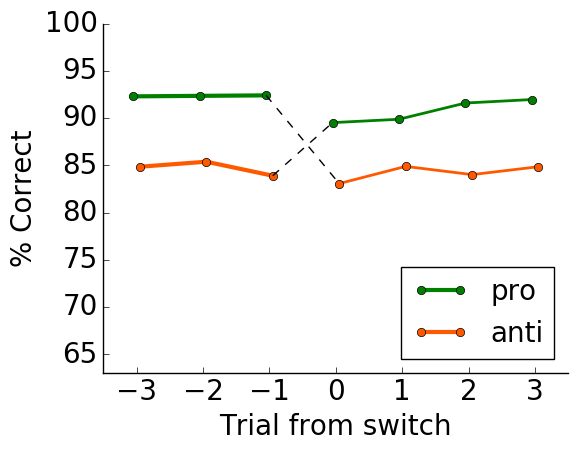

VirtualRat37


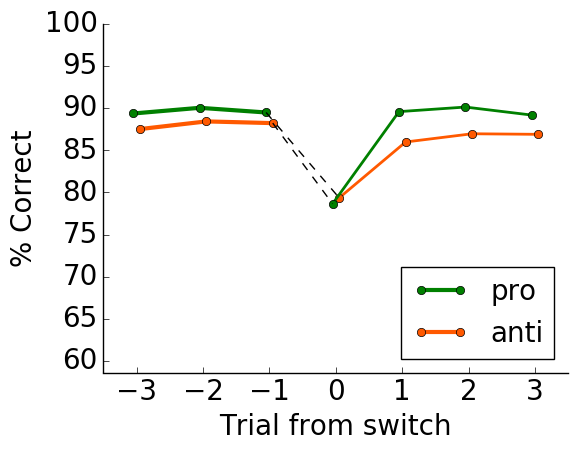

VirtualRat38


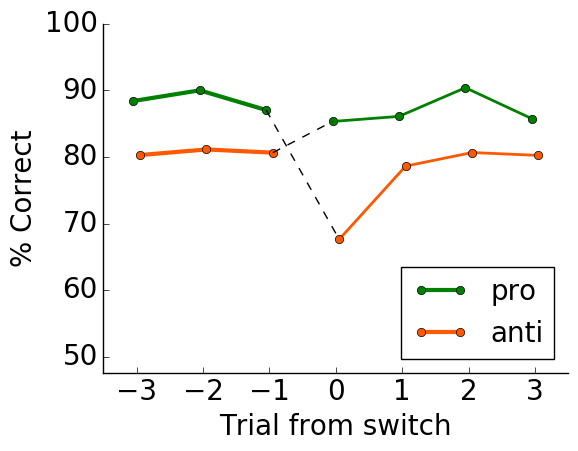

VirtualRat39


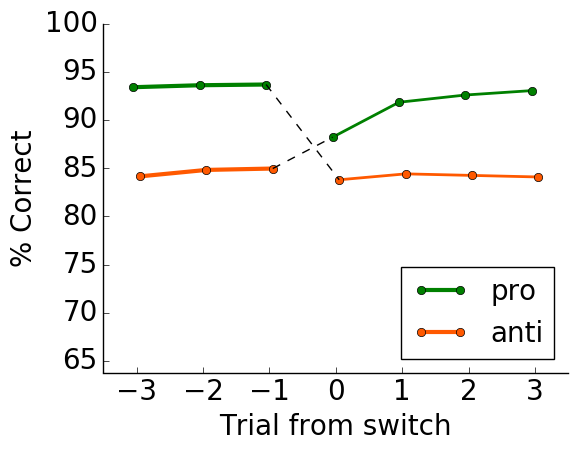

VirtualRat41


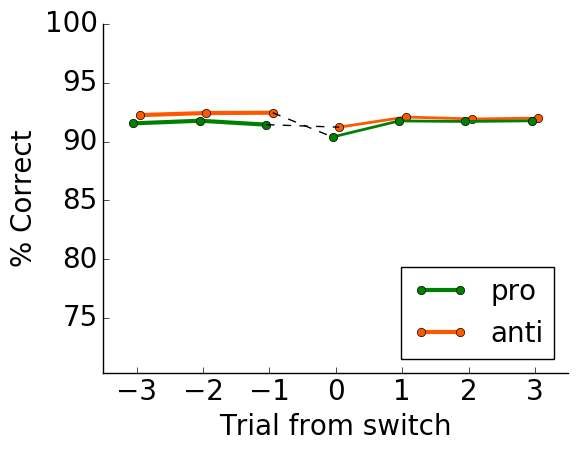

VirtualRat42


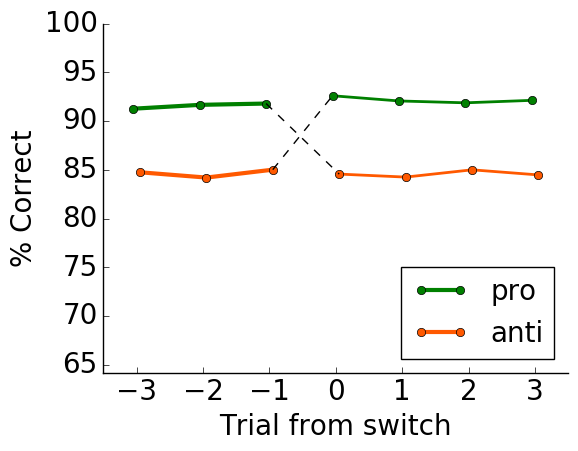

VirtualRat43


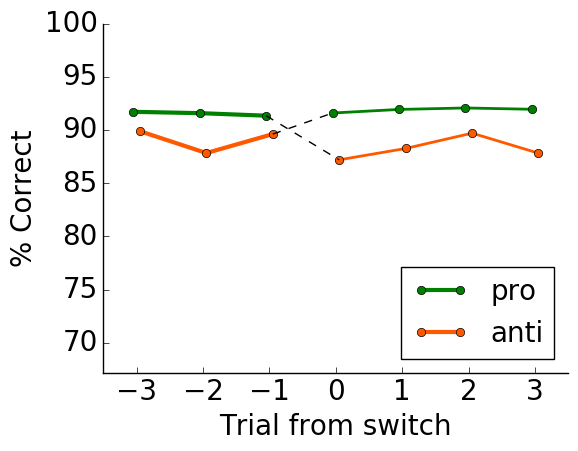

VirtualRat44


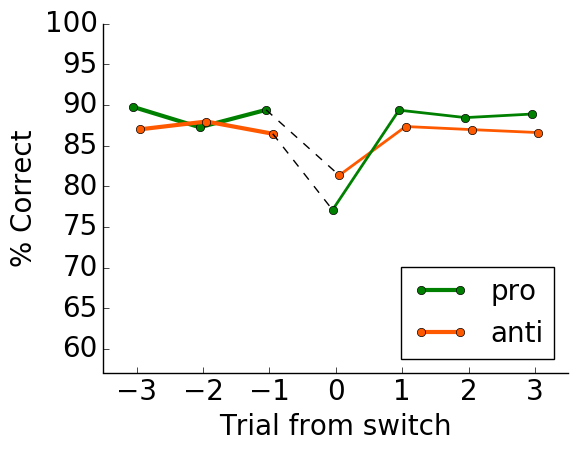

VirtualRat45


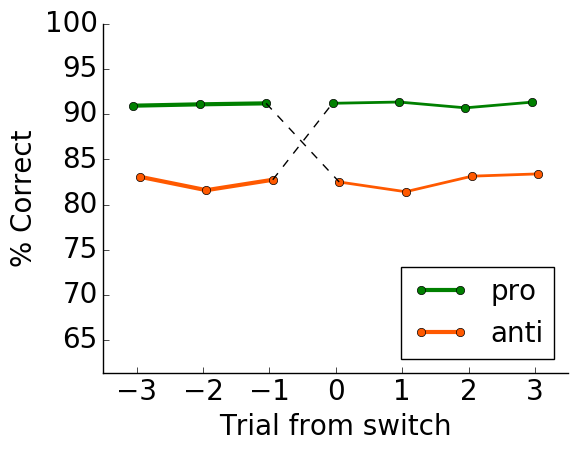

VirtualRat46


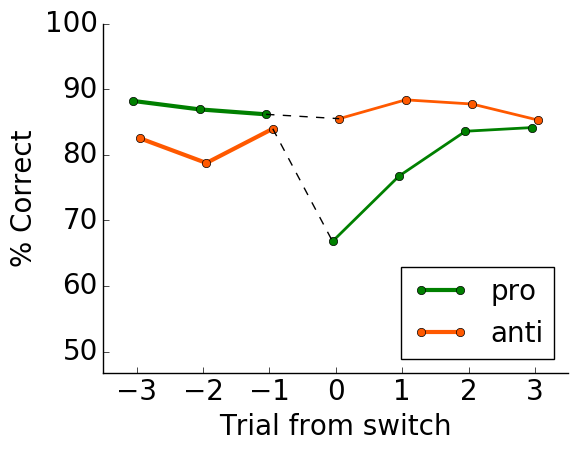

VirtualRat47


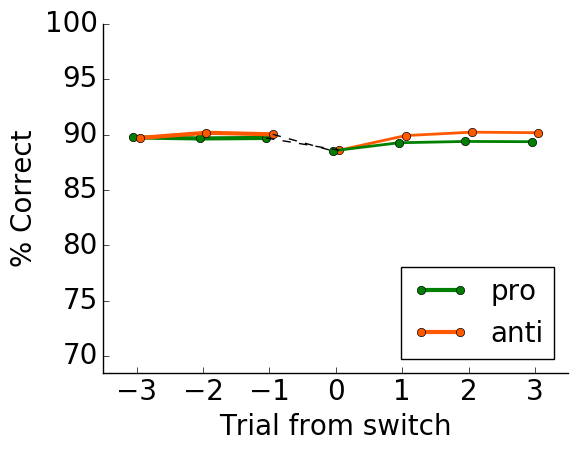

VirtualRat48


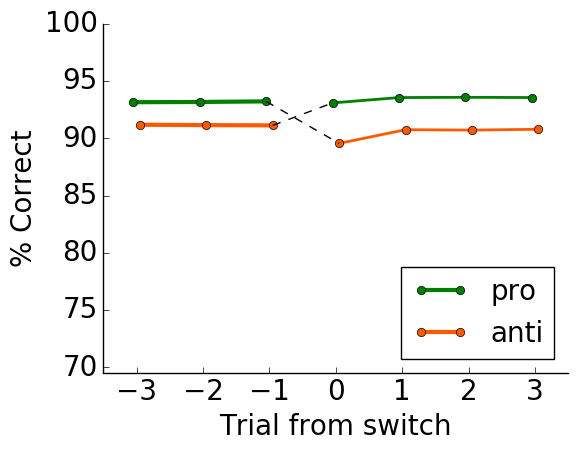

VirtualRat50


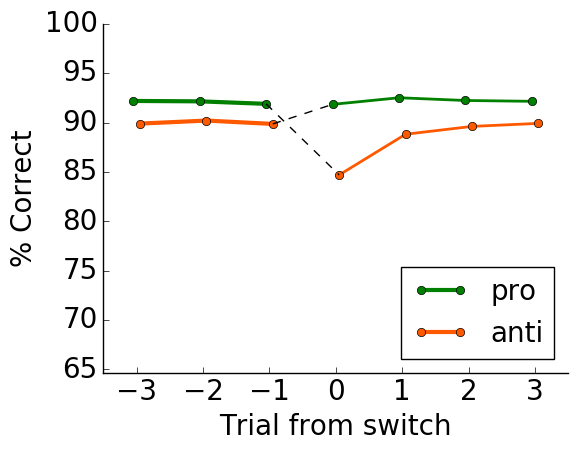

VirtualRat51


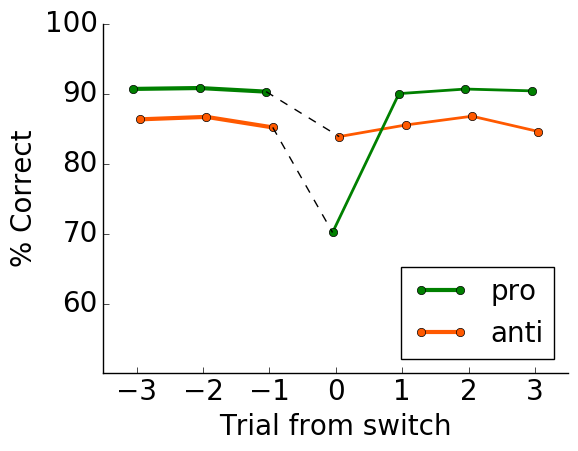

VirtualRat52


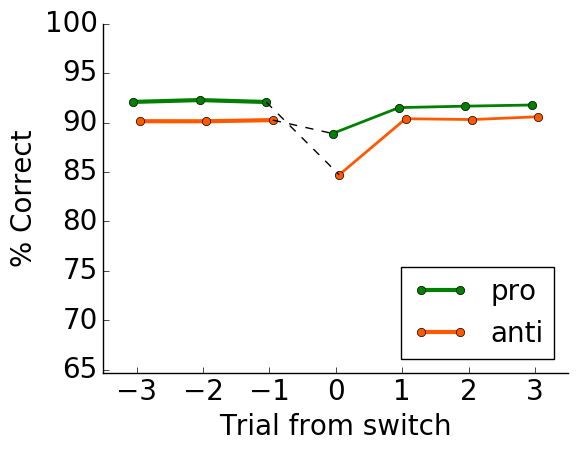

VirtualRat53


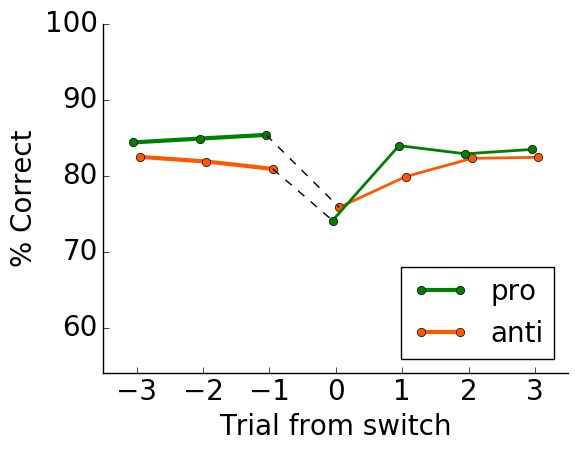

VirtualRat54


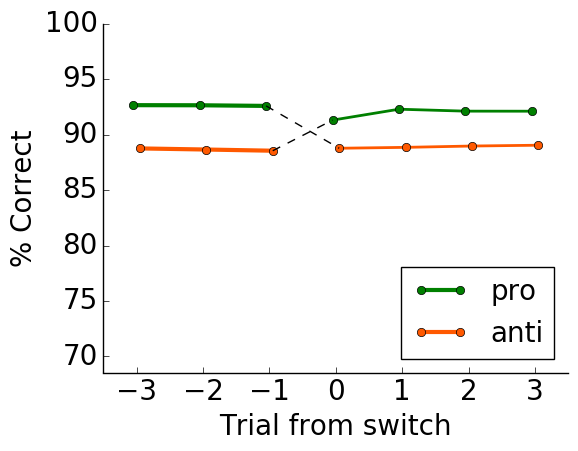

VirtualRat55


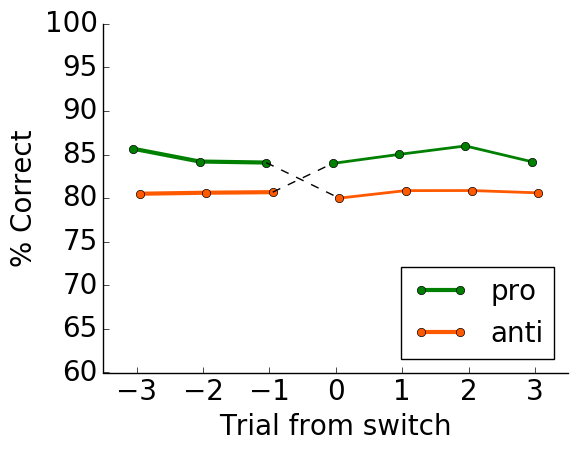

VirtualRat56


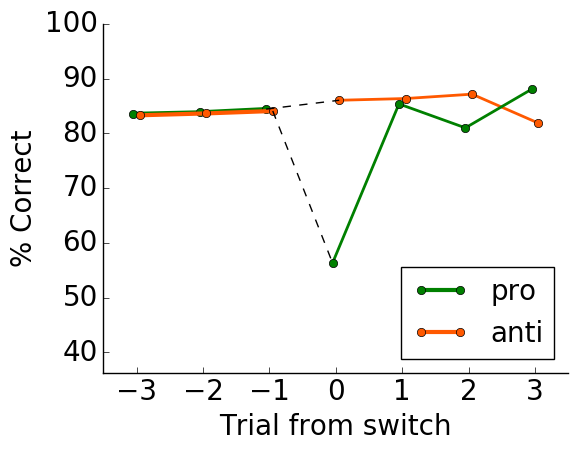

VirtualRat57


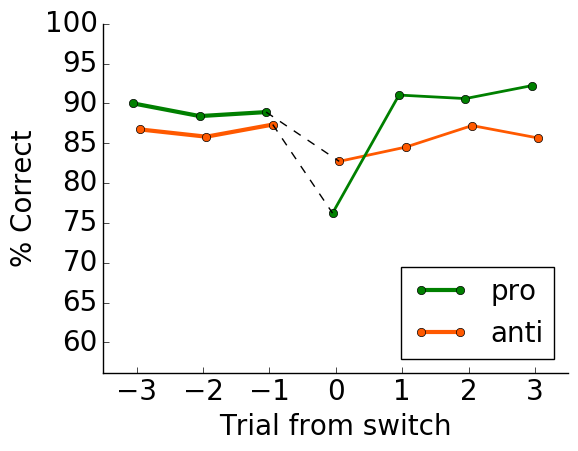

VirtualRat58


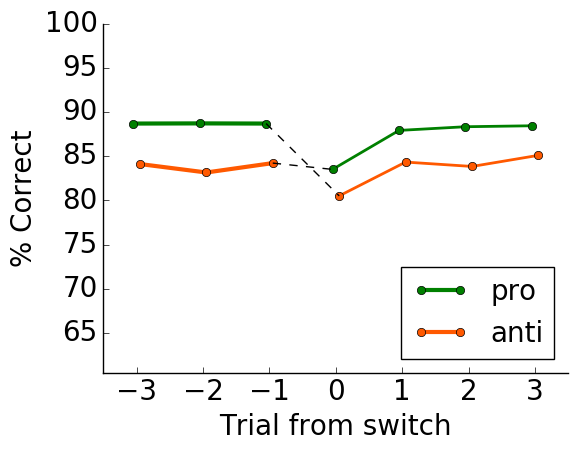

VirtualRat59


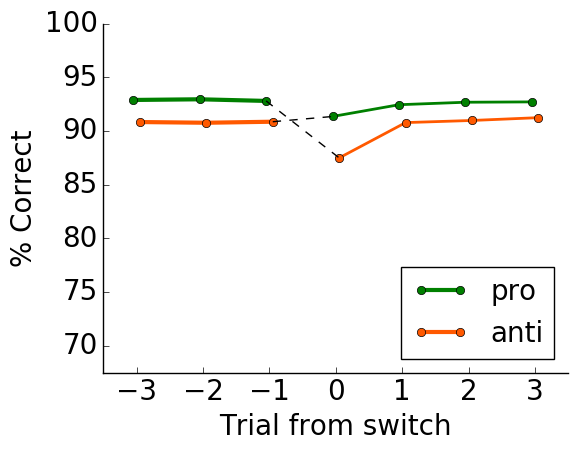

VirtualRat60


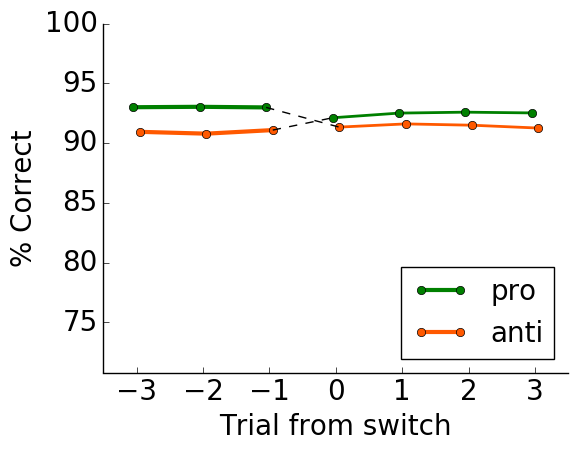

VirtualRat61


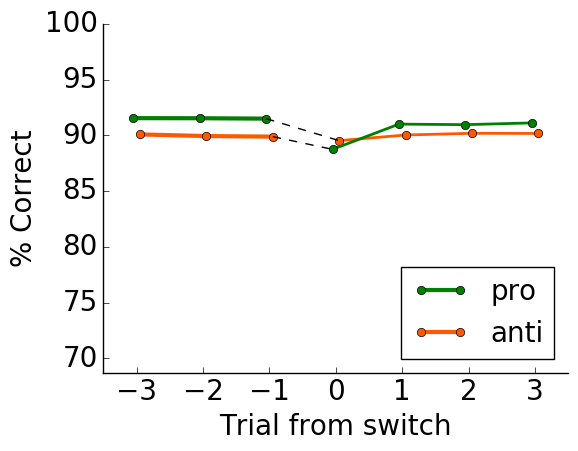

VirtualRat62


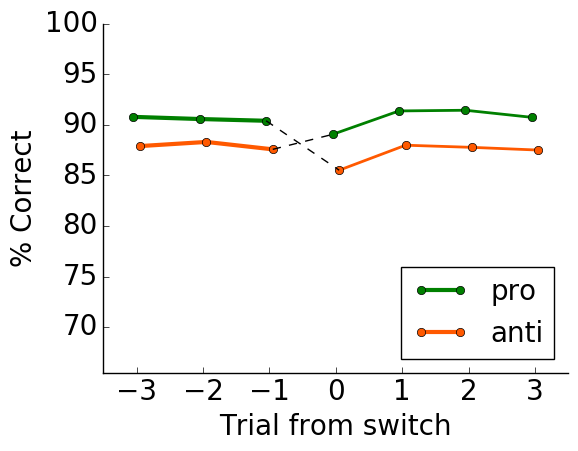

VirtualRat63


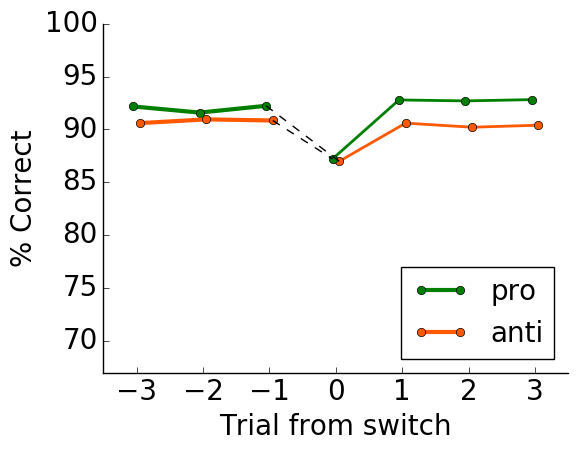

VirtualRat64


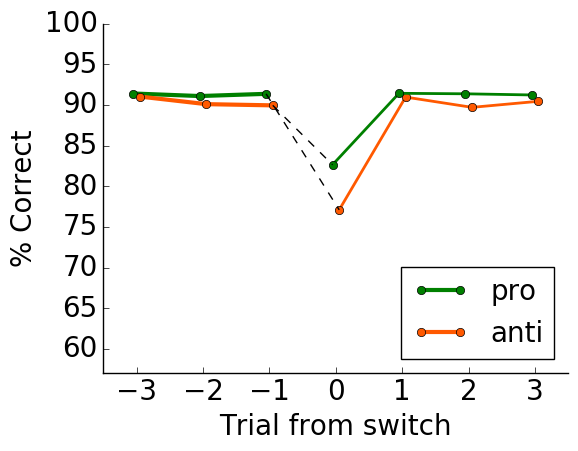

VirtualRat65


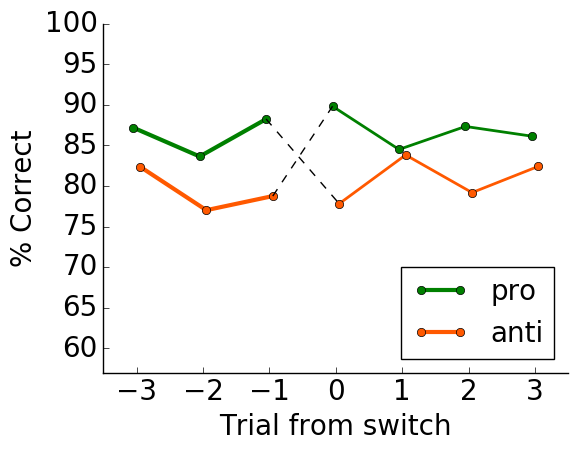

VirtualRat66


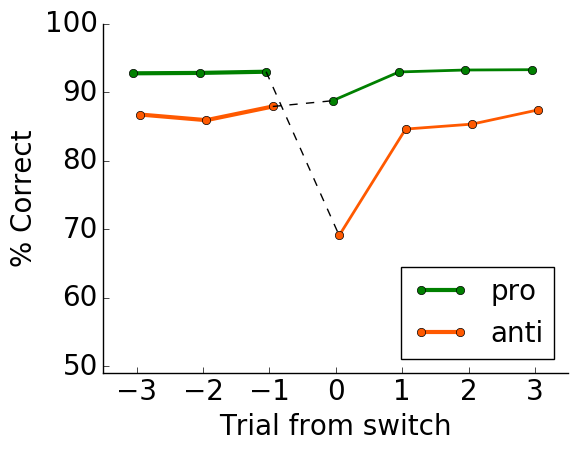

VirtualRat67


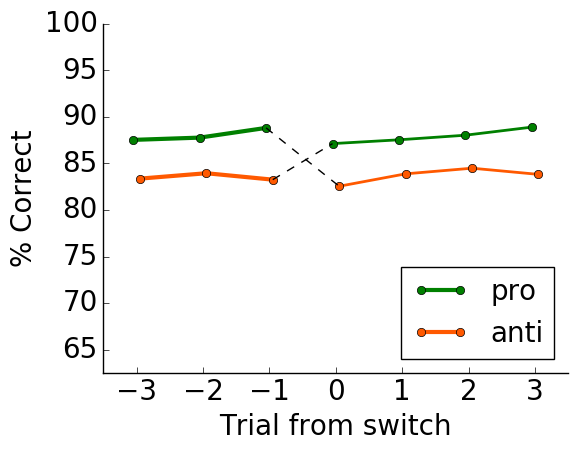

VirtualRat68


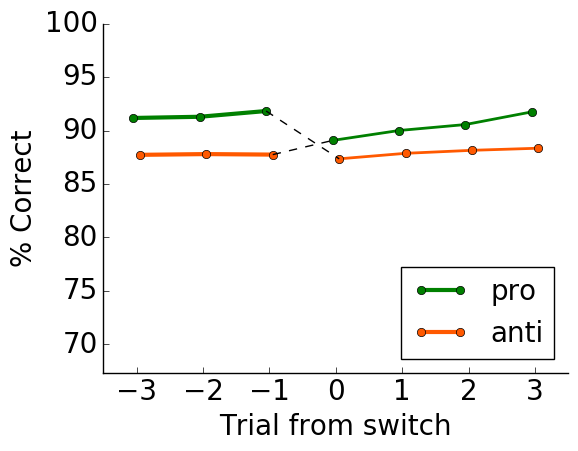

VirtualRat69


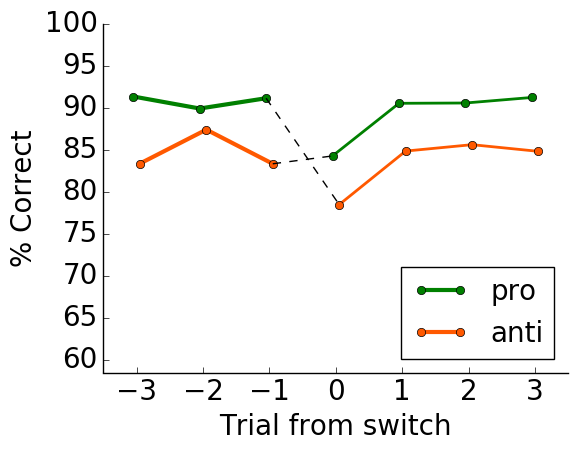

VirtualRat70


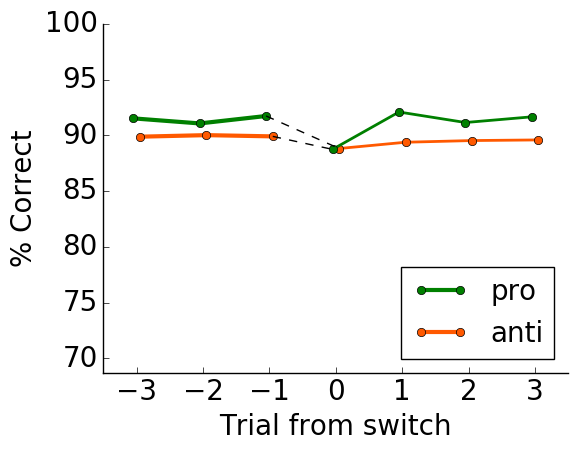

VirtualRat71


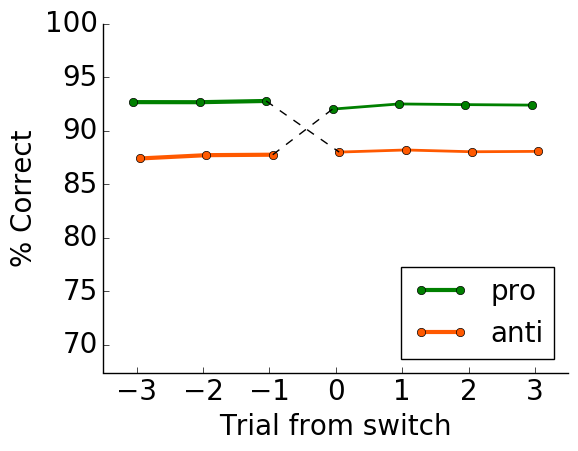

VirtualRat73


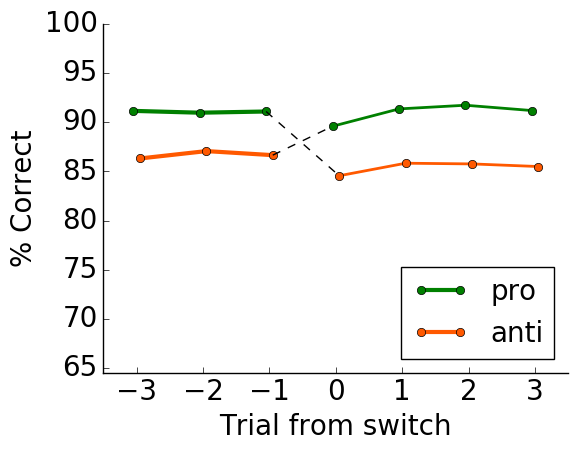

VirtualRat74


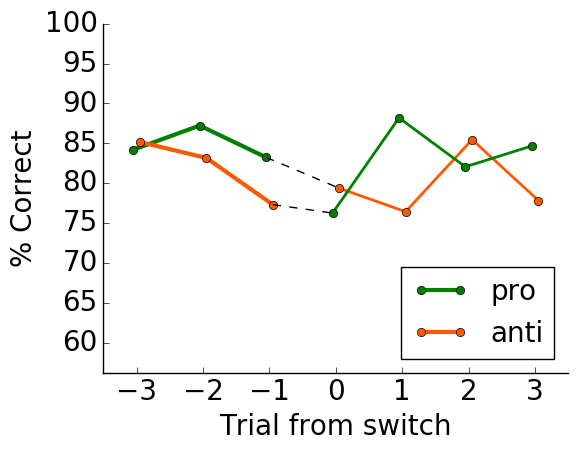

VirtualRat75


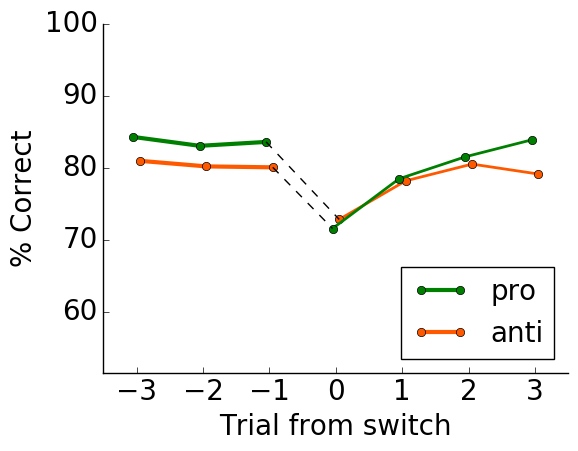

VirtualRat76


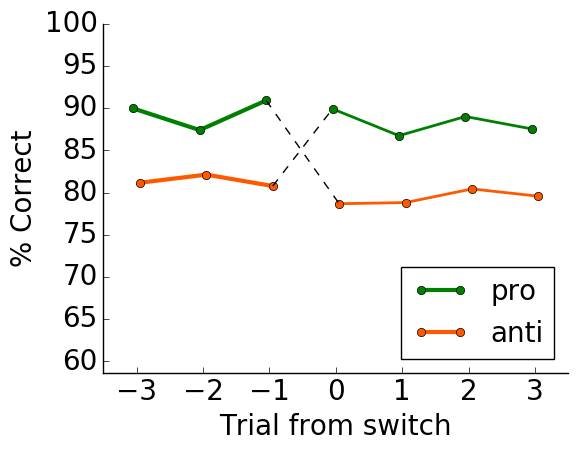

VirtualRat77


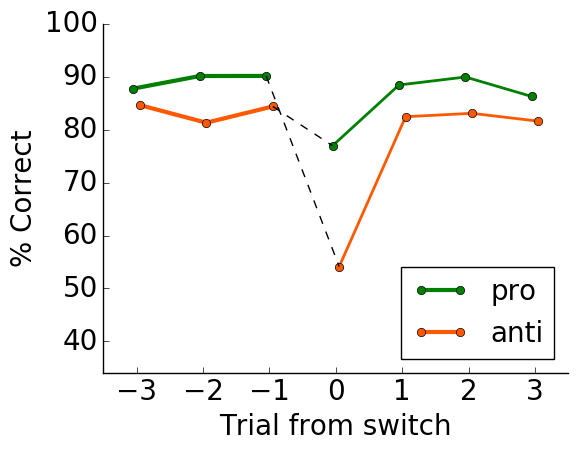

VirtualRat78


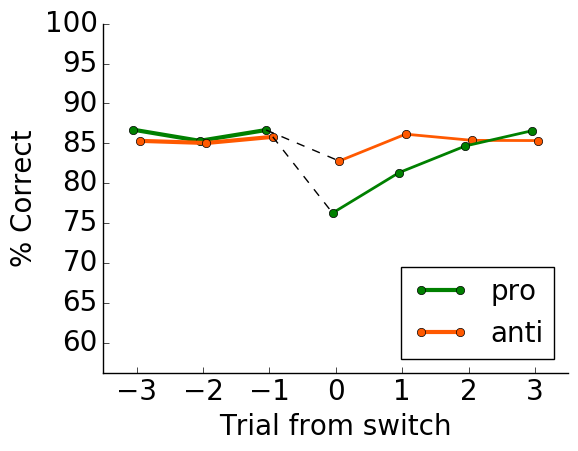

VirtualRat79


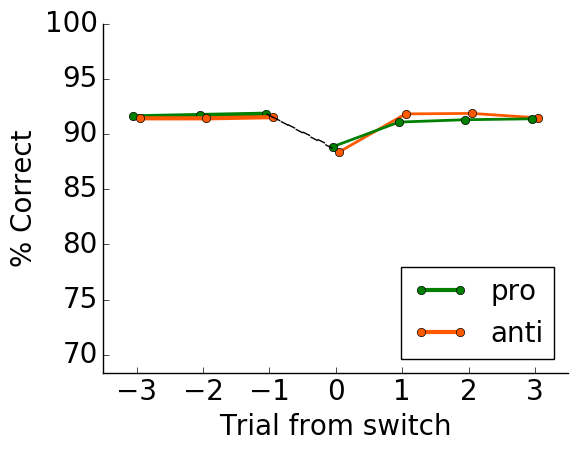

VirtualRat80


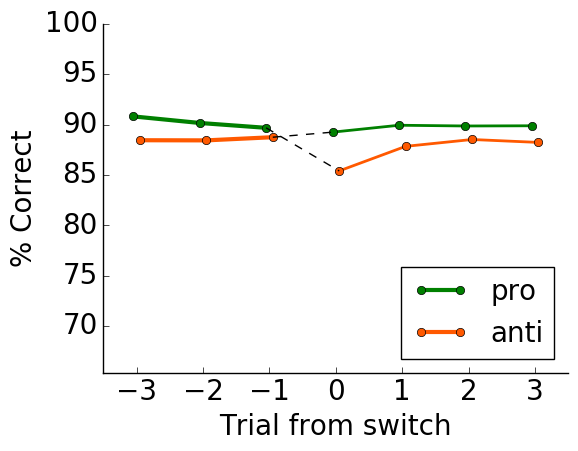

VirtualRat81


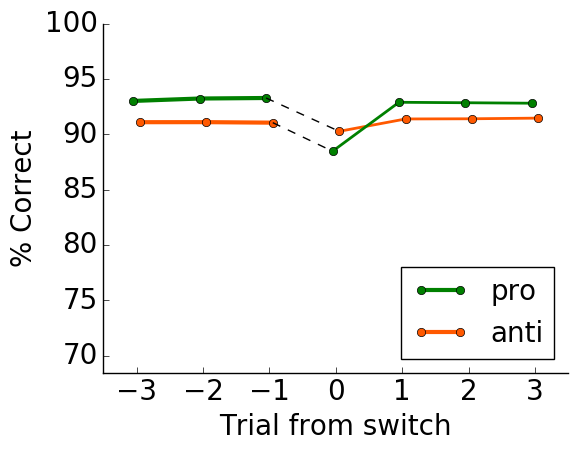

VirtualRat83


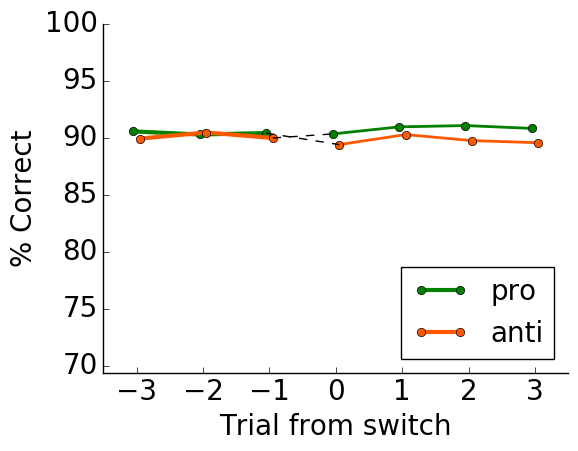

VirtualRat84


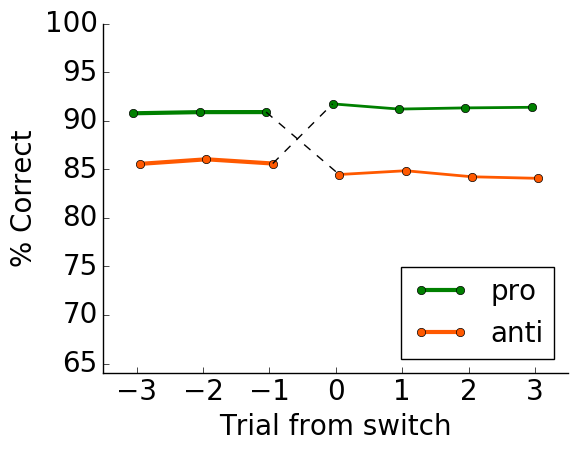

VirtualRat85


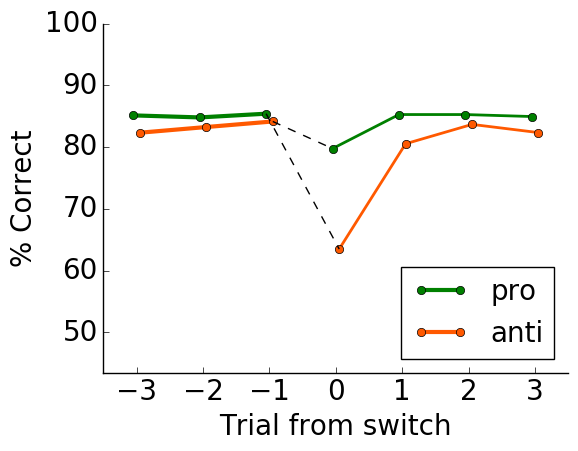

VirtualRat86


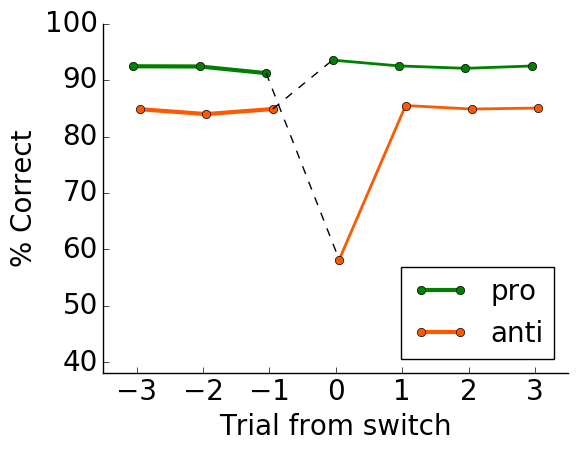

VirtualRat87


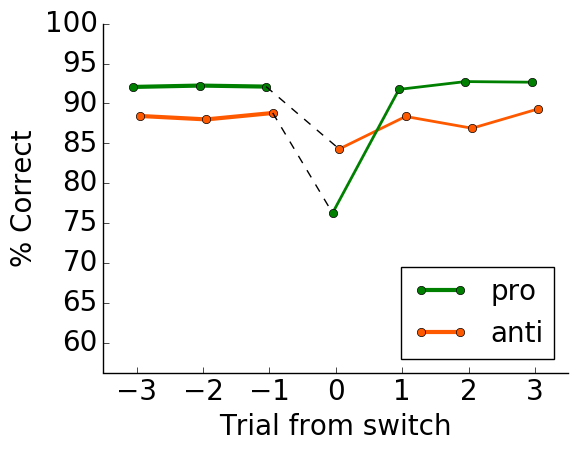

VirtualRat88


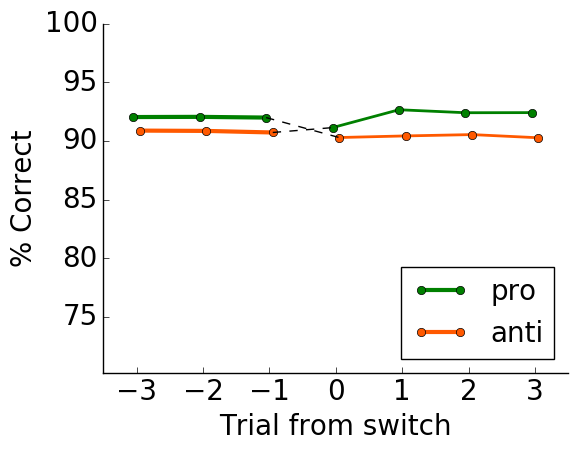

VirtualRat89


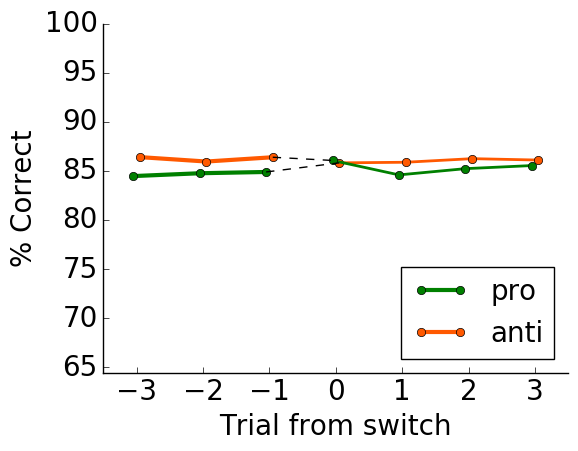

VirtualRat90


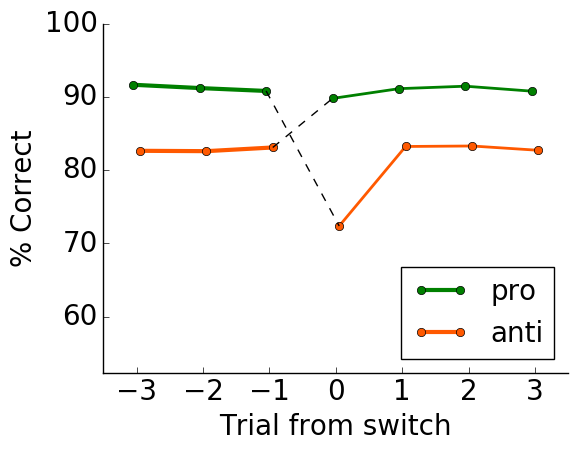

VirtualRat91


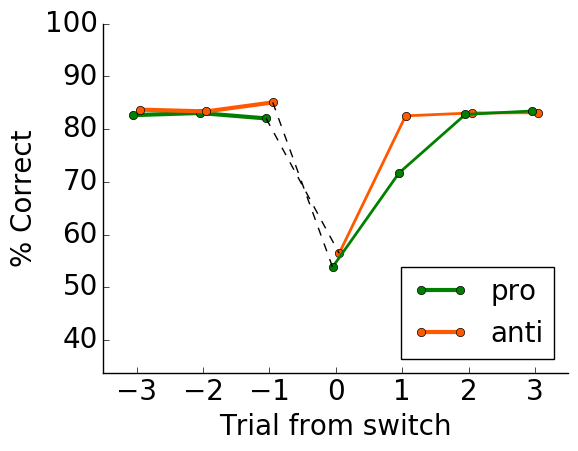

VirtualRat92


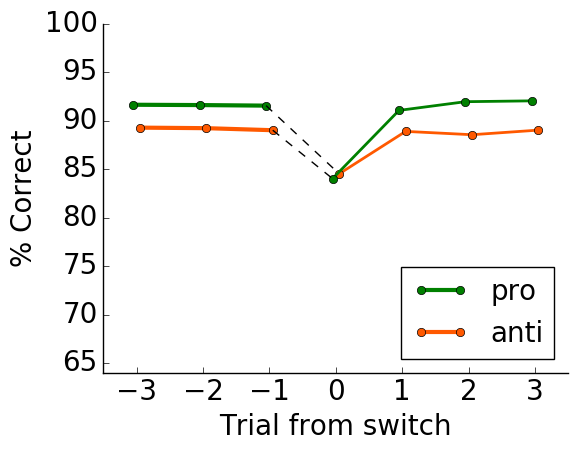

VirtualRat93


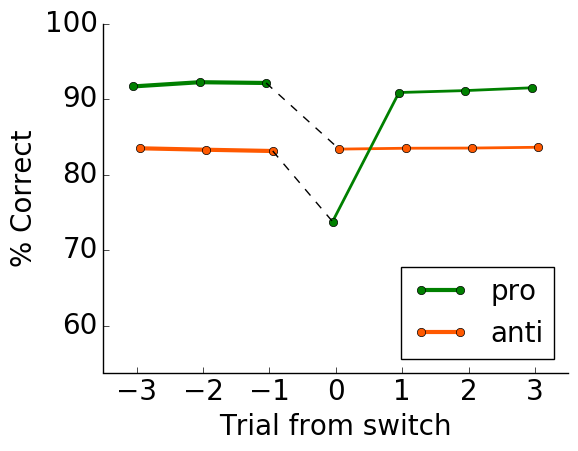

VirtualRat94


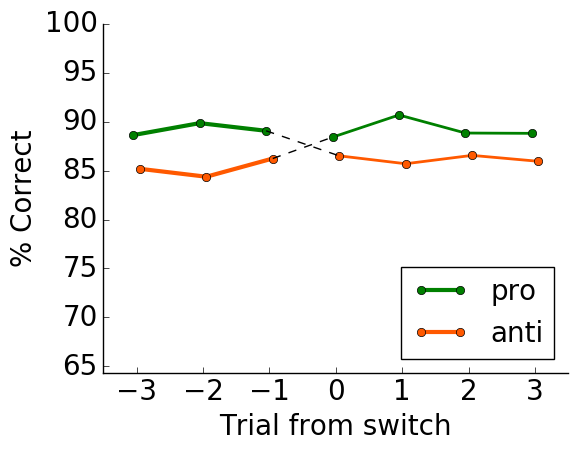

VirtualRat95


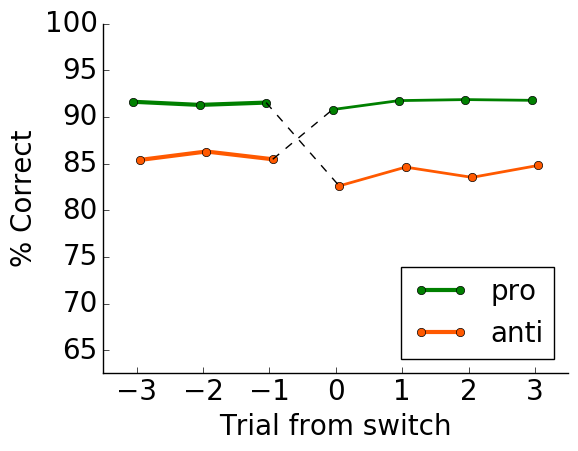

VirtualRat96


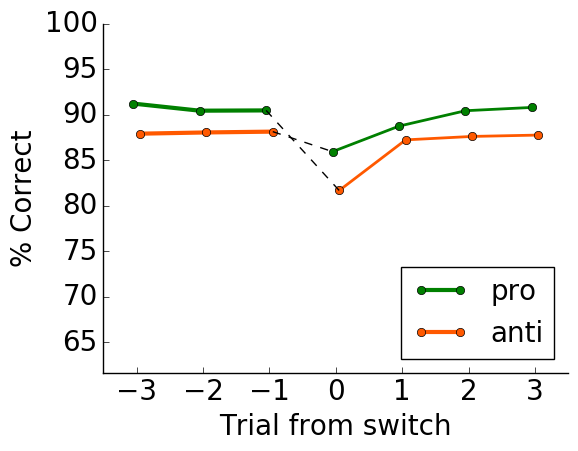

VirtualRat98


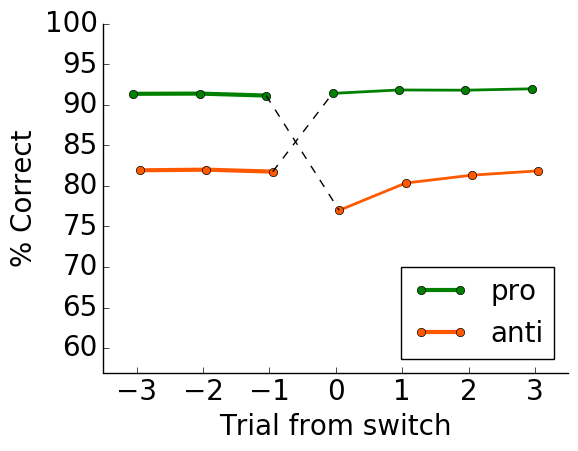

VirtualRat99


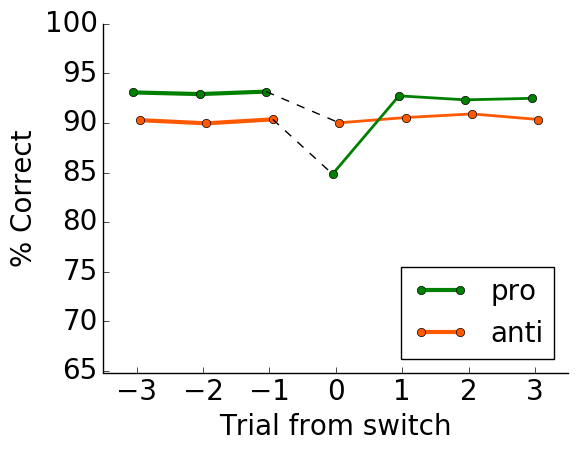

In [3]:
rats = []
trial_window = 3

for i in range(len(which_to_choose)):
    ratname = "VirtualRat"+str(which_to_choose[i][0])
    try:
        loaded_params = load_weights("/scratch/xl1066/VirtualRat/poster/TrainingTime/trainedTrainingTime-"+\
                                     str(which_to_choose[i][0])+"-"+str(which_to_choose[i][1]*100)+".pkl")
        print ratname
    except IOError:
        continue
    np.random.seed(which_to_choose[i][0])
    npp.random.seed(which_to_choose[i][0])
    box = VirtualRatBox(mode="alternative",length=1000,block_size=30)
    test_X, test_y = box.X, box.y
    model = VirtualRatModel()
    rat = VirtualRat(model,ratname = ratname, trial_window = trial_window)
    rats.append(rat)
    solver = VirtualRatSolver(model, box) # Dummmy solver in order to load weights.
    solver.init()
    solver.load_params(loaded_params)
    probs = rat.predict(test_X, test_y)
    draw_3d(rat.p2a_prob*100, rat.a2p_prob*100, trial_window = trial_window, fixed_size= False)
    rat.compute_PETH_ROC()

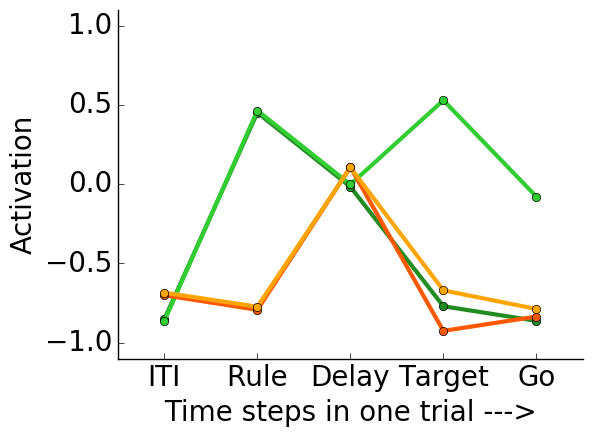

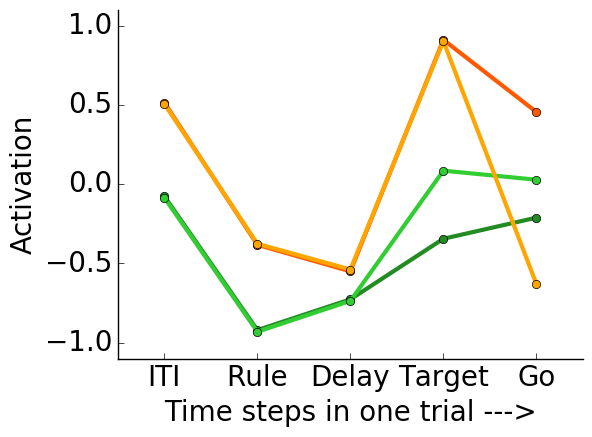

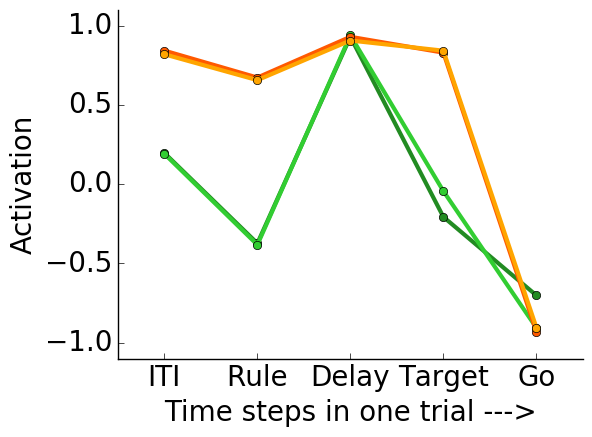

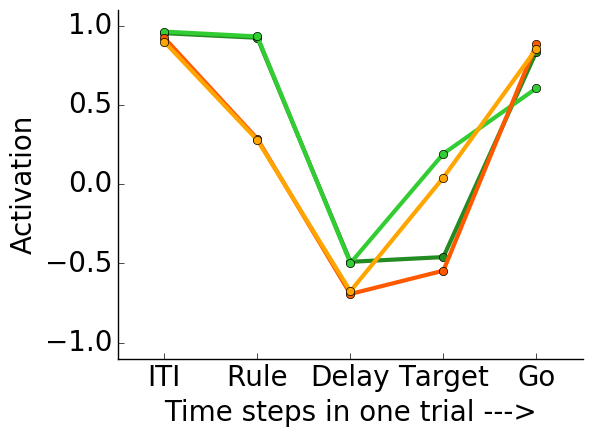

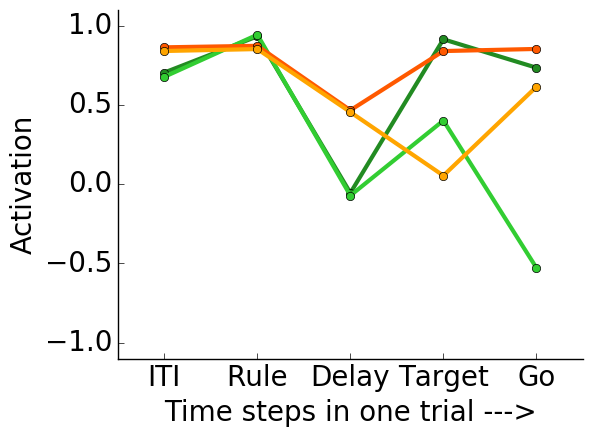

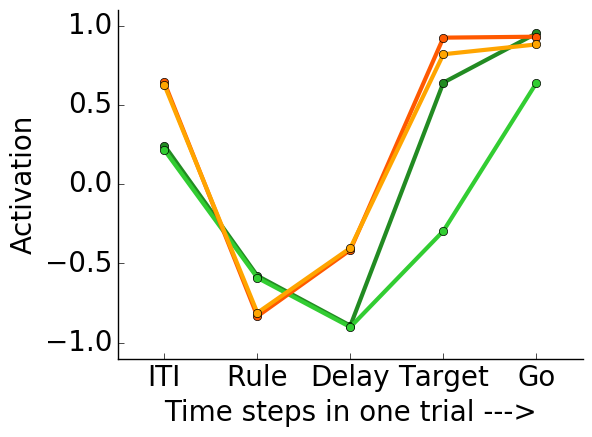

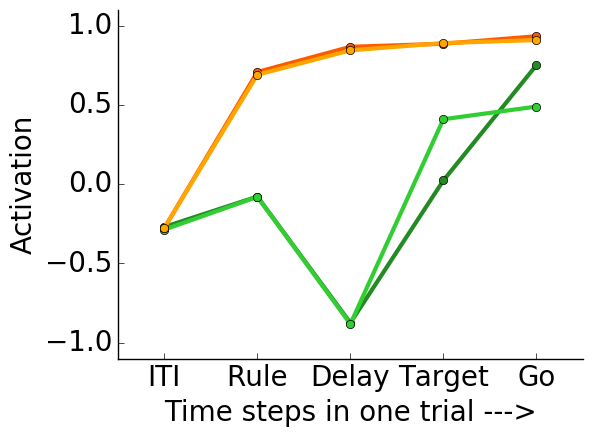

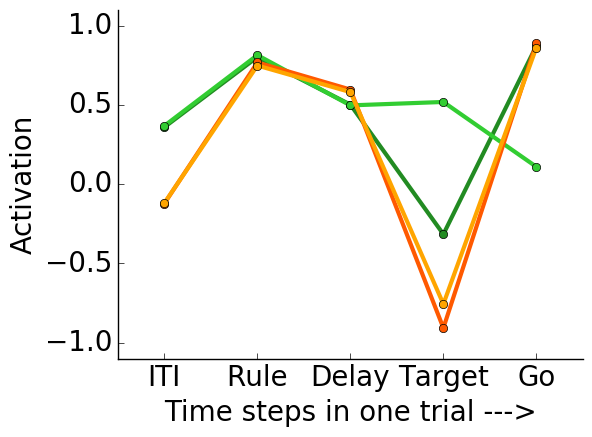

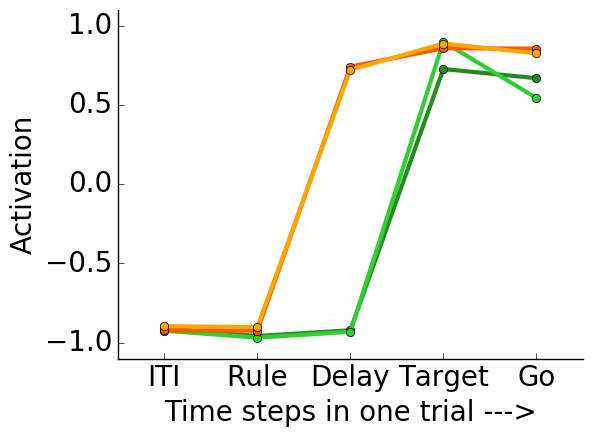

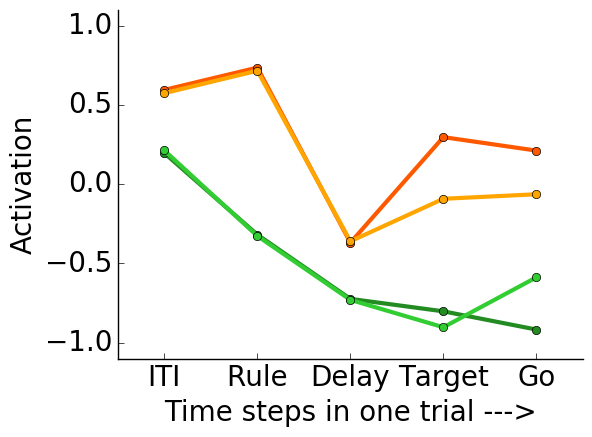

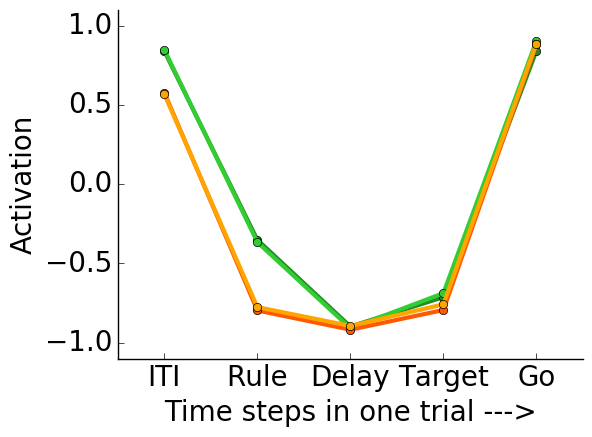

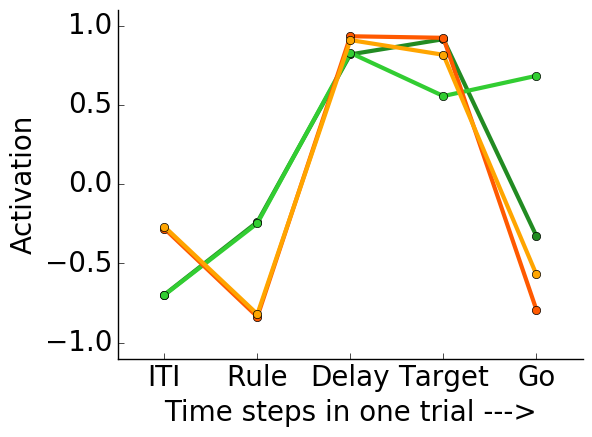

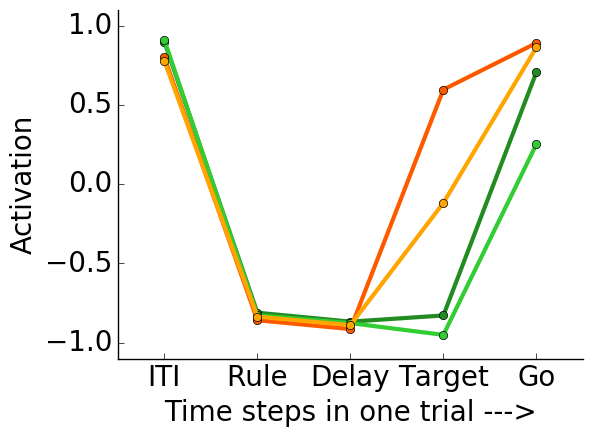

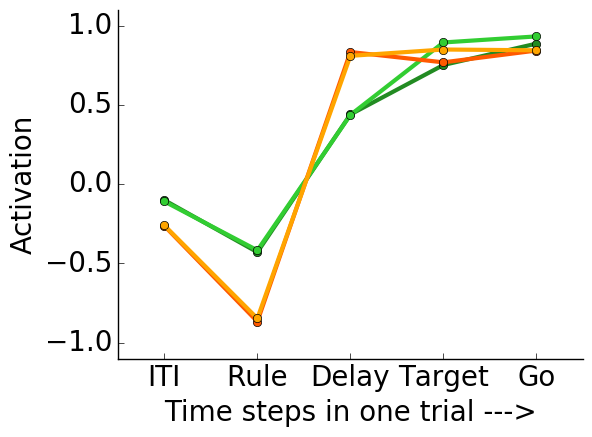

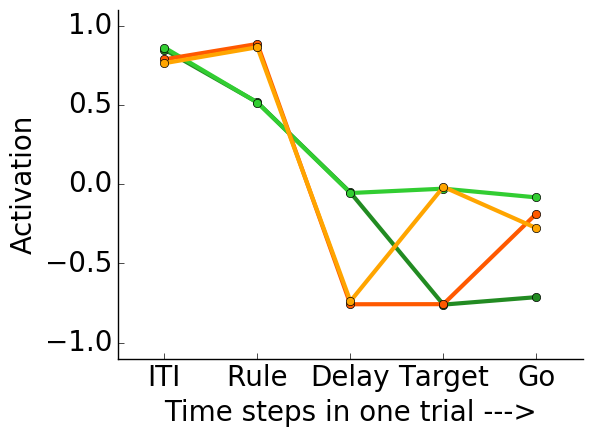

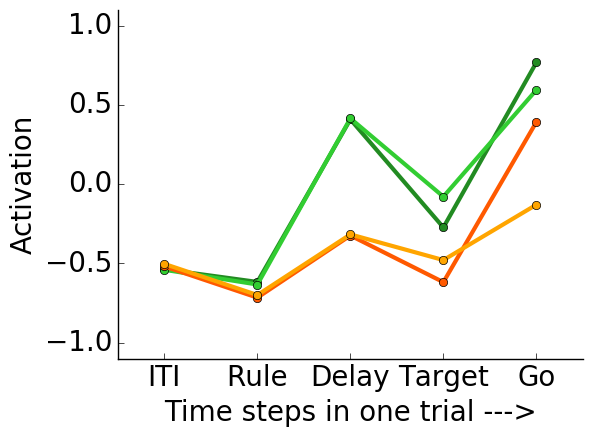

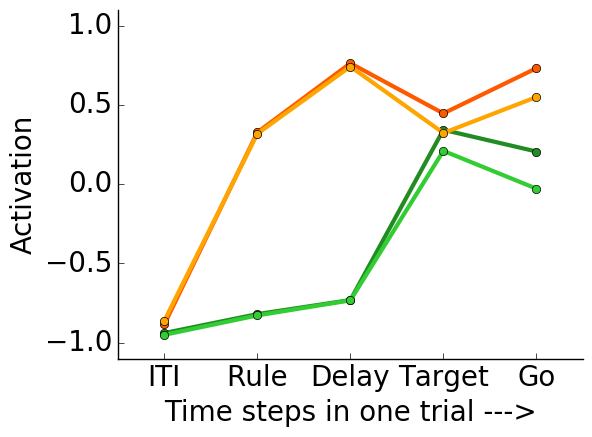

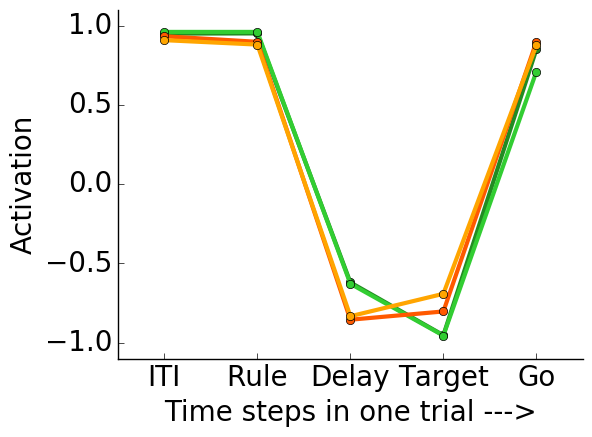

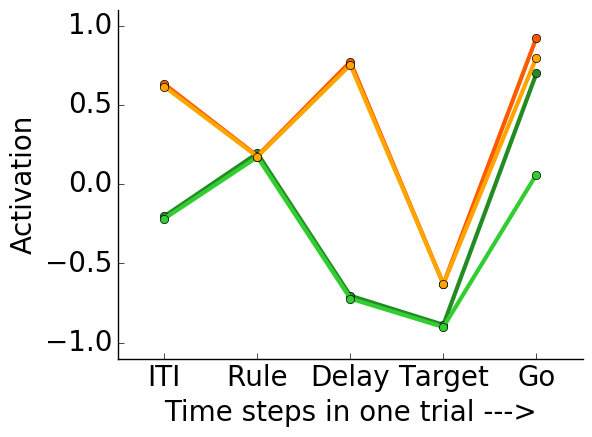

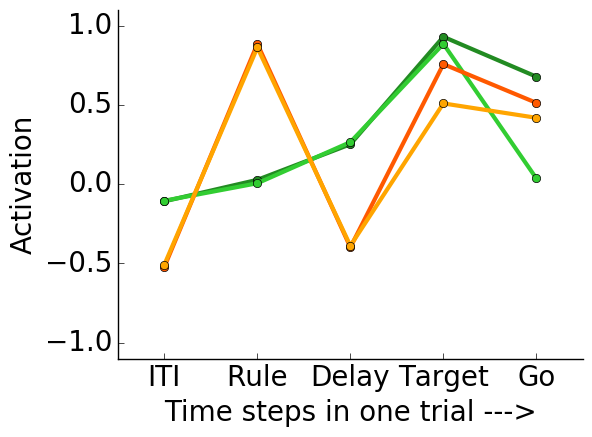

In [23]:
PETH(rats[-3],switch=False, filename="PETH_block", legend = False)